# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:]

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [ ]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
%matplotlib inline

In [ ]:
# distribution of classes
plt.hist(y_train, bins=100);

In [ ]:
def show_examples(images, labels, rows, cols, cls=None):
    plt.figure()
    for i in range(rows):
        for j in range(cols):
            plt.subplot(rows,cols,i*rows+j+1)
            while True:
                example = np.random.randint(0, len(images))
                if cls is None or labels[example]==cls:
                    break
            plt.title('img {}: {}'.format(example, labels[example]))
            if len(images.shape)==4:
                plt.imshow(images[example,:,:,:]);
            else:
                plt.imshow(images[example,:,:], cmap='Greys_r');

rows = 10
cols = 10
cls = None
show_examples(X_train, y_train, rows, cols, cls)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [ ]:
def normalize_data(image_data):
    #a = 0.1
    #b = 0.9
    greyscale_mean = np.mean(image_data, axis=0)
    #greyscale_max = np.max(image_data, axis=0)
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )    

In [4]:
def normalize_data(image_data):
    grayscale = np.mean(image_data, axis=3)
    mean = np.mean(grayscale, axis=0)
    std = np.std(grayscale, axis=0)
    return ( ( (grayscale - mean) )/( std ) )    

In [ ]:
# only compute mean from real training data, then apply to validation and test
# usually zero-center and normalize
# rarely do PCA to lower dimension (not with CNNs) and may be whitening to exagerrate noise

In [5]:
x_train_norm = normalize_data(X_train)
x_test_norm = normalize_data(X_test)

In [6]:
x_train_norm.shape

(39209, 32, 32)

In [ ]:
rows = 10
cols = 10
cls = None
show_examples(x_train_norm, y_train, rows, cols, cls)

In [ ]:
x_train_norm.shape

In [ ]:
y_test[:10]

In [7]:
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train_norm = encoder.transform(y_train)
y_test_norm = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train_norm = y_train_norm.astype(np.float32)
y_test_norm  = y_test_norm.astype(np.float32)

In [ ]:
y_train_norm.shape

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

Alexey:
I have decided to start with simple normalization of levels, keeping RGB channels intact



.

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [8]:
pct_train = 90.
pct_valid = 10.
random_state = 123

#n = x_train_norm.shape[0]
train_features, val_features, train_labels, val_labels = train_test_split(
                                                            x_train_norm, y_train_norm, 
                                                            train_size = pct_train/100., 
                                                            test_size = pct_valid/100.,
                                                            random_state = random_state)

In [ ]:
train_features.shape, train_labels.shape

In [9]:
features_count = np.prod(train_features.shape[1:])
labels_count = len(set(y_train))
features_count, labels_count

(1024, 43)

In [10]:
len(train_features)

35288

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [11]:
import tensorflow as tf
import math
from datetime import datetime

/Users/alexeysimonov/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# Set the features and labels tensors
with tf.device('/gpu:0'):
#    with tf.variable_scope('foo', reuse=True):
        features = tf.placeholder(tf.float32)
        labels = tf.placeholder(tf.float32)

        features_flat = tf.reshape(features, [-1, features_count])

        n_hidden_layer = 1000 # layer number of features

        init_range1 = math.sqrt(6.0 / (features_count + n_hidden_layer))
        init_range2 = math.sqrt(6.0 / (labels_count + n_hidden_layer))
        weights = {
            'hidden_layer': tf.Variable(tf.random_uniform([features_count, n_hidden_layer], -init_range1, init_range1)),
            #'hidden_layer': tf.get_variable('w1', 
            #                                shape=[features_count, n_hidden_layer],
            #                                initializer=tf.contrib.layers.xavier_initializer(features_count, n_hidden_layer)
            #                               ),
            'out': tf.Variable(tf.random_uniform([n_hidden_layer, labels_count], -init_range2, init_range2))
            #'out': tf.get_variable('w2', 
            #                       shape=[n_hidden_layer, labels_count],
            #                       initializer=tf.contrib.layers.xavier_initializer(n_hidden_layer, labels_count)
            #                      )
        }
        biases = {
            'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
            'out': tf.Variable(tf.random_normal([labels_count]))
        }

        #weights = tf.Variable(tf.truncated_normal((features_count, labels_count)))
        #biases = tf.Variable(tf.zeros(labels_count))

        logits = tf.add(tf.matmul(features_flat, weights['hidden_layer']), biases['hidden_layer'])
        layer_1 = tf.nn.relu(logits)
        logits2 = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

        prediction = tf.nn.softmax(logits2)

        # Cross entropy
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits2, labels)
        #-tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

        # Training loss
        loss = tf.reduce_mean(cross_entropy)
        loss_sum = tf.reduce_sum(cross_entropy)

        # Determine if the predictions are correct
        is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
        # Calculate the accuracy of the predictions
        accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))
        accuracy_sum = tf.reduce_sum(tf.cast(is_correct_prediction, tf.float32))

        # Create an operation that initializes all variables
        init = tf.initialize_all_variables()


In [13]:
# learning parameters
epochs = 500
batch_size = 200
learning_rate = 0.07
model_param_file = 'perceptron1000-gray-relu.ckpt'

In [14]:
# Feed dicts for training, validation, and test session
train_feed_dict = {features: train_features, labels: train_labels}
val_feed_dict = {features: val_features, labels: val_labels}
#test_feed_dict = {features: test_features, labels: test_labels}

In [ ]:
# for debug
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    
batch_count = int(math.ceil(len(train_features)/batch_size))
session = tf.Session()
session.run(init)
batch_i = 0
batch_start = batch_i*batch_size
batch_features = train_features[batch_start:batch_start + batch_size]
batch_labels = train_labels[batch_start:batch_start + batch_size]

In [ ]:
batch_features.shape, batch_labels.shape

In [ ]:
#pr = tf.Print(prediction, [tf.shape(prediction)], 'prediction shape = ', first_n=100)
out = session.run(
    [cross_entropy],
    feed_dict={features: batch_features, labels: batch_labels})

In [ ]:
#out

In [ ]:
len(out)

In [ ]:
out[0].shape

In [15]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    
# The accuracy measured against the validation set
validation_accuracy = 0.0
# Measurements use for graphing loss and accuracy
#log_batch_step = 50
#batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

# to save all trained variables, but not the graph
saver = tf.train.Saver()

#GPU config
config=tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.8

st = datetime.now()

a_ = 0

with tf.Session(config=config) as session:
    session.run(init)
    for epoch_i in range(epochs):
        # train for one epoch
        # random training set permutation
        perm_index = np.random.permutation(len(train_features))
        train_features = train_features[perm_index]
        train_labels = train_labels[perm_index]
        # batches
        batch_count = int(math.ceil(len(train_features)/batch_size))
        batches_pbar = tqdm(range(batch_count), desc='Train Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        for batch_i in batches_pbar:
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]
            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels})
        # save checkpoint every epoch
        saver.save(session, model_param_file, global_step=epoch_i)
        # Log accuracy every epoch. have to calculate accuracy in batches as cannot 
        # fit entire test set on GPU
        # training accuracy
        batch_count = int(math.ceil(len(train_features)/batch_size))
        batches_pbar = tqdm(range(batch_count), desc='Train Accuracy Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        l = 0.
        a = 0.
        for batch_i in batches_pbar:
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]
            # Run optimizer and get loss
            l_, a_ = session.run(
                [loss_sum, accuracy_sum],
                feed_dict={features: batch_features, labels: batch_labels})
            l += l_
            a += a_
        loss_batch.append(l / len(train_features))
        train_acc_batch.append(a / len(train_features))
        # validation accuracy
        batch_count = int(math.ceil(len(val_features)/batch_size))
        batches_pbar = tqdm(range(batch_count), desc='Val Accuracy Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        a = 0.
        for batch_i in batches_pbar:
            batch_start = batch_i*batch_size
            batch_features = val_features[batch_start:batch_start + batch_size]
            batch_labels = val_labels[batch_start:batch_start + batch_size]
            # Run optimizer and get loss
            a_ = session.run(
                [accuracy_sum],
                feed_dict={features: batch_features, labels: batch_labels})
            a += a_[0]
        validation_accuracy = a / len(val_features)
        valid_acc_batch.append(validation_accuracy)
        print('epoch {}, val accuracy: {}'.format(epoch_i, validation_accuracy))
print('runtime: {}'.format(datetime.now()-st))

Train Epoch  2/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 0, val accuracy: 0.62203519510329


Val Accuracy Epoch  2/500: 100%|██████████| 20/20 [00:00<00:00, 251.18batches/s]


epoch 1, val accuracy: 0.7299158377964805


Train Epoch  4/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 2, val accuracy: 0.7595001275184902


Val Accuracy Epoch  4/500: 100%|██████████| 20/20 [00:00<00:00, 244.58batches/s]


epoch 3, val accuracy: 0.8408569242540168


Train Epoch  6/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 4, val accuracy: 0.7753124203009436


Train Epoch  7/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 5, val accuracy: 0.8477429227237949


Train Epoch  8/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 6, val accuracy: 0.8107625605712828


Train Epoch  9/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 7, val accuracy: 0.9005355776587605


Train Epoch 10/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 8, val accuracy: 0.9099719459321601


Train Epoch 11/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 9, val accuracy: 0.8426421831165519


Val Accuracy Epoch 11/500: 100%|██████████| 20/20 [00:00<00:00, 201.66batches/s]


epoch 10, val accuracy: 0.8908441724049987


Train Epoch 13/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 11, val accuracy: 0.8969650599336904


Train Epoch 14/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 12, val accuracy: 0.8921193573068095


Train Epoch 15/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 13, val accuracy: 0.8808977301708748


Val Accuracy Epoch 15/500: 100%|██████████| 20/20 [00:00<00:00, 213.00batches/s]


epoch 14, val accuracy: 0.9069115021678144


Train Epoch 17/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 15, val accuracy: 0.9296097934200459


Train Epoch 18/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 16, val accuracy: 0.9173680183626626


Train Epoch 19/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 17, val accuracy: 0.9306299413414946


Train Epoch 20/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 18, val accuracy: 0.9319051262433052


Train Epoch 21/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 19, val accuracy: 0.9339454220862025


Train Epoch 22/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 20, val accuracy: 0.9405763835756185


Train Epoch 23/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 21, val accuracy: 0.9326702371843917


Train Epoch 24/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 22, val accuracy: 0.9329252741647539


Train Epoch 25/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 23, val accuracy: 0.90640142820709


Train Epoch 26/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 24, val accuracy: 0.928079571537873


Train Epoch 27/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 25, val accuracy: 0.9472073450650345


Train Epoch 28/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 26, val accuracy: 0.9217036470288191


Train Epoch 29/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 27, val accuracy: 0.939811272634532


Train Epoch 30/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 28, val accuracy: 0.9525631216526397


Train Epoch 31/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 29, val accuracy: 0.9523080846722775


Train Epoch 32/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 30, val accuracy: 0.9385360877327212


Train Epoch 33/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 31, val accuracy: 0.9227237949502678


Train Epoch 34/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 32, val accuracy: 0.9046161693445549


Train Epoch 35/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 33, val accuracy: 0.8768171384850804


Train Epoch 36/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 34, val accuracy: 0.9375159398112727


Train Epoch 37/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 35, val accuracy: 0.9520530476919153


Train Epoch 38/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 36, val accuracy: 0.9173680183626626


Train Epoch 39/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 37, val accuracy: 0.9390461616934456


Train Epoch 40/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 38, val accuracy: 0.9558786023973476


Train Epoch 41/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 39, val accuracy: 0.9308849783218567


Train Epoch 42/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 40, val accuracy: 0.9484825299668452


Train Epoch 43/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 41, val accuracy: 0.9594491201224178


Train Epoch 44/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 42, val accuracy: 0.9319051262433052


Train Epoch 45/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 43, val accuracy: 0.9538383065544503


Train Epoch 46/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 44, val accuracy: 0.946442234123948


Train Epoch 47/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 45, val accuracy: 0.9607243050242286


Val Accuracy Epoch 47/500: 100%|██████████| 20/20 [00:00<00:00, 244.07batches/s]


epoch 46, val accuracy: 0.9584289722009691


Train Epoch 49/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 47, val accuracy: 0.9543483805151747


Train Epoch 50/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 48, val accuracy: 0.9563886763580719


Train Epoch 51/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 49, val accuracy: 0.9589390461616935


Train Epoch 52/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 50, val accuracy: 0.9637847487885743


Train Epoch 53/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 51, val accuracy: 0.9586840091813313


Train Epoch 54/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 52, val accuracy: 0.9642948227492987


Train Epoch 55/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 53, val accuracy: 0.9589390461616935


Train Epoch 56/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 54, val accuracy: 0.9655700076511095


Train Epoch 57/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 55, val accuracy: 0.9635297118082122


Train Epoch 58/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 56, val accuracy: 0.9591940831420556


Train Epoch 59/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 57, val accuracy: 0.9604692680438663


Train Epoch 60/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 58, val accuracy: 0.9393011986738077


Train Epoch 61/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 59, val accuracy: 0.9617444529456771


Train Epoch 62/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 60, val accuracy: 0.9576638612598827


Train Epoch 63/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 61, val accuracy: 0.9395562356541699


Train Epoch 64/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 62, val accuracy: 0.9540933435348126


Train Epoch 65/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 63, val accuracy: 0.9630196378474879


Train Epoch 66/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 64, val accuracy: 0.9535832695740882


Train Epoch 67/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 65, val accuracy: 0.9625095638867636


Train Epoch 68/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 66, val accuracy: 0.9627646008671258


Train Epoch 69/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 67, val accuracy: 0.9597041571027799


Train Epoch 70/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 68, val accuracy: 0.9619994899260392


Train Epoch 71/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 69, val accuracy: 0.9625095638867636


Train Epoch 72/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 70, val accuracy: 0.9668451925529201


Train Epoch 73/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 71, val accuracy: 0.9257842387146136


Train Epoch 74/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 72, val accuracy: 0.9540933435348126


Train Epoch 75/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 73, val accuracy: 0.959959194083142


Train Epoch 76/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 74, val accuracy: 0.9676103034940067


Train Epoch 77/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 75, val accuracy: 0.9512879367508289


Train Epoch 78/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 76, val accuracy: 0.9619994899260392


Train Epoch 79/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 77, val accuracy: 0.961489415965315


Train Epoch 80/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 78, val accuracy: 0.954858454475899


Train Epoch 81/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 79, val accuracy: 0.9441469013006886


Train Epoch 82/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 80, val accuracy: 0.9127773527161438


Train Epoch 83/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 81, val accuracy: 0.94312675337924


Train Epoch 84/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 82, val accuracy: 0.8816628411119612


Train Epoch 85/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 83, val accuracy: 0.9479724560061209


Train Epoch 86/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 84, val accuracy: 0.9597041571027799


Train Epoch 87/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 85, val accuracy: 0.9421066054577913


Train Epoch 88/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 86, val accuracy: 0.9622545269064015


Train Epoch 89/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 87, val accuracy: 0.9671002295332823


Train Epoch 90/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 88, val accuracy: 0.94312675337924


Train Epoch 91/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 89, val accuracy: 0.9637847487885743


Train Epoch 92/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 90, val accuracy: 0.9630196378474879


Train Epoch 93/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 91, val accuracy: 0.9658250446314716


Train Epoch 94/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 92, val accuracy: 0.9681203774547309


Train Epoch 95/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 93, val accuracy: 0.9681203774547309


Train Epoch 96/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 94, val accuracy: 0.9671002295332823


Train Epoch 97/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 95, val accuracy: 0.9622545269064015


Train Epoch 98/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 96, val accuracy: 0.9546034174955369


Train Epoch 99/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 97, val accuracy: 0.9609793420045907


Train Epoch 100/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 98, val accuracy: 0.9704157102779903


Train Epoch 101/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 99, val accuracy: 0.9642948227492987


Train Epoch 102/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 100, val accuracy: 0.9673552665136445


Train Epoch 103/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 101, val accuracy: 0.9681203774547309


Train Epoch 104/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 102, val accuracy: 0.9676103034940067


Train Epoch 105/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 103, val accuracy: 0.9673552665136445


Train Epoch 106/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 104, val accuracy: 0.9186432032644734


Train Epoch 107/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 105, val accuracy: 0.9663351185921959


Train Epoch 108/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 106, val accuracy: 0.9640397857689365


Train Epoch 109/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 107, val accuracy: 0.9609793420045907


Train Epoch 110/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 108, val accuracy: 0.9574088242795206


Train Epoch 111/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 109, val accuracy: 0.9500127518490181


Train Epoch 112/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 110, val accuracy: 0.9688854883958173


Train Epoch 113/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 111, val accuracy: 0.9658250446314716


Train Epoch 114/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 112, val accuracy: 0.9523080846722775


Train Epoch 115/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 113, val accuracy: 0.9681203774547309


Train Epoch 116/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 114, val accuracy: 0.9673552665136445


Train Epoch 117/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 115, val accuracy: 0.9619994899260392


Train Epoch 118/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 116, val accuracy: 0.9655700076511095


Train Epoch 119/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 117, val accuracy: 0.966590155572558


Train Epoch 120/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 118, val accuracy: 0.9676103034940067


Val Accuracy Epoch 120/500: 100%|██████████| 20/20 [00:00<00:00, 222.75batches/s]


epoch 119, val accuracy: 0.9691405253761796


Train Epoch 122/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 120, val accuracy: 0.964804896710023


Train Epoch 123/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 121, val accuracy: 0.9676103034940067


Train Epoch 124/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 122, val accuracy: 0.9676103034940067


Train Epoch 125/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 123, val accuracy: 0.9663351185921959


Train Epoch 126/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 124, val accuracy: 0.9469523080846722


Train Epoch 127/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 125, val accuracy: 0.9676103034940067


Train Epoch 128/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 126, val accuracy: 0.9678653404743688


Train Epoch 129/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 127, val accuracy: 0.9660800816118337


Train Epoch 130/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 128, val accuracy: 0.966590155572558


Train Epoch 131/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 129, val accuracy: 0.9676103034940067


Train Epoch 132/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 130, val accuracy: 0.9691405253761796


Train Epoch 133/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 131, val accuracy: 0.961489415965315


Train Epoch 134/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 132, val accuracy: 0.9658250446314716


Train Epoch 135/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 133, val accuracy: 0.9645498597296608


Train Epoch 136/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 134, val accuracy: 0.948227492986483


Train Epoch 137/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 135, val accuracy: 0.9706707472583525


Train Epoch 138/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 136, val accuracy: 0.9693955623565417


Train Epoch 139/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 137, val accuracy: 0.9520530476919153


Train Epoch 140/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 138, val accuracy: 0.9553685284366233


Train Epoch 141/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 139, val accuracy: 0.9602142310635042


Train Epoch 142/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 140, val accuracy: 0.9637847487885743


Train Epoch 143/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 141, val accuracy: 0.9681203774547309


Train Epoch 144/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 142, val accuracy: 0.9671002295332823


Train Epoch 145/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 143, val accuracy: 0.9563886763580719


Train Epoch 146/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 144, val accuracy: 0.9645498597296608


Train Epoch 147/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 145, val accuracy: 0.9709257842387146


Train Epoch 148/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 146, val accuracy: 0.9653149706707472


Train Epoch 149/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 147, val accuracy: 0.9701606732976281


Train Epoch 150/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 148, val accuracy: 0.9683754144350931


Train Epoch 151/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 149, val accuracy: 0.966590155572558


Train Epoch 152/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 150, val accuracy: 0.9711808212190768


Train Epoch 153/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 151, val accuracy: 0.9683754144350931


Train Epoch 154/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 152, val accuracy: 0.9683754144350931


Train Epoch 155/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 153, val accuracy: 0.9546034174955369


Train Epoch 156/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 154, val accuracy: 0.9686304514154552


Train Epoch 157/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 155, val accuracy: 0.9691405253761796


Train Epoch 158/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 156, val accuracy: 0.9683754144350931


Train Epoch 159/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 157, val accuracy: 0.9520530476919153


Train Epoch 160/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 158, val accuracy: 0.9597041571027799


Train Epoch 161/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 159, val accuracy: 0.9681203774547309


Train Epoch 162/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 160, val accuracy: 0.969905636317266


Train Epoch 163/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 161, val accuracy: 0.9714358581994389


Train Epoch 164/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 162, val accuracy: 0.9691405253761796


Train Epoch 165/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 163, val accuracy: 0.9505228258097425


Train Epoch 166/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 164, val accuracy: 0.9400663096148941


Train Epoch 167/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 165, val accuracy: 0.9671002295332823


Train Epoch 168/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 166, val accuracy: 0.9660800816118337


Train Epoch 169/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 167, val accuracy: 0.9701606732976281


Train Epoch 170/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 168, val accuracy: 0.9507778627901046


Train Epoch 171/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 169, val accuracy: 0.9696505993369039


Train Epoch 172/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 170, val accuracy: 0.9691405253761796


Train Epoch 173/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 171, val accuracy: 0.9683754144350931


Train Epoch 174/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 172, val accuracy: 0.9688854883958173


Train Epoch 175/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 173, val accuracy: 0.9586840091813313


Train Epoch 176/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 174, val accuracy: 0.9696505993369039


Train Epoch 177/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 175, val accuracy: 0.9714358581994389


Train Epoch 178/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 176, val accuracy: 0.9709257842387146


Train Epoch 179/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 177, val accuracy: 0.954858454475899


Train Epoch 180/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 178, val accuracy: 0.9696505993369039


Train Epoch 181/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 179, val accuracy: 0.9637847487885743


Train Epoch 182/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 180, val accuracy: 0.9704157102779903


Train Epoch 183/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 181, val accuracy: 0.9683754144350931


Train Epoch 184/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 182, val accuracy: 0.9627646008671258


Train Epoch 185/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 183, val accuracy: 0.9693955623565417


Train Epoch 186/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 184, val accuracy: 0.966590155572558


Train Epoch 187/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 185, val accuracy: 0.9691405253761796


Train Epoch 188/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 186, val accuracy: 0.9701606732976281


Train Epoch 189/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 187, val accuracy: 0.928079571537873


Train Epoch 190/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 188, val accuracy: 0.9719459321601632


Train Epoch 191/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 189, val accuracy: 0.958173935220607


Train Epoch 192/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 190, val accuracy: 0.9714358581994389


Train Epoch 193/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 191, val accuracy: 0.9671002295332823


Train Epoch 194/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 192, val accuracy: 0.9655700076511095


Train Epoch 195/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 193, val accuracy: 0.9686304514154552


Train Epoch 196/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 194, val accuracy: 0.9693955623565417


Train Epoch 197/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 195, val accuracy: 0.9683754144350931


Train Epoch 198/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 196, val accuracy: 0.9688854883958173


Train Epoch 199/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 197, val accuracy: 0.9704157102779903


Train Epoch 200/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 198, val accuracy: 0.969905636317266


Train Epoch 201/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 199, val accuracy: 0.9683754144350931


Train Epoch 202/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 200, val accuracy: 0.9704157102779903


Train Epoch 203/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 201, val accuracy: 0.9688854883958173


Train Epoch 204/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 202, val accuracy: 0.9484825299668452


Train Epoch 205/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 203, val accuracy: 0.9704157102779903


Train Epoch 206/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 204, val accuracy: 0.9696505993369039


Train Epoch 207/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 205, val accuracy: 0.9701606732976281


Train Epoch 208/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 206, val accuracy: 0.9673552665136445


Train Epoch 209/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 207, val accuracy: 0.9693955623565417


Train Epoch 210/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 208, val accuracy: 0.9619994899260392


Train Epoch 211/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 209, val accuracy: 0.9625095638867636


Train Epoch 212/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 210, val accuracy: 0.9691405253761796


Train Epoch 213/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 211, val accuracy: 0.9696505993369039


Train Epoch 214/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 212, val accuracy: 0.9688854883958173


Train Epoch 215/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 213, val accuracy: 0.9673552665136445


Train Epoch 216/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 214, val accuracy: 0.9678653404743688


Train Epoch 217/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 215, val accuracy: 0.9704157102779903


Train Epoch 218/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 216, val accuracy: 0.9683754144350931


Train Epoch 219/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 217, val accuracy: 0.9701606732976281


Train Epoch 220/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 218, val accuracy: 0.9701606732976281


Train Epoch 221/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 219, val accuracy: 0.969905636317266


Train Epoch 222/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 220, val accuracy: 0.9497577148686559


Train Epoch 223/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 221, val accuracy: 0.9696505993369039


Train Epoch 224/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 222, val accuracy: 0.9678653404743688


Train Epoch 225/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 223, val accuracy: 0.969905636317266


Train Epoch 226/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 224, val accuracy: 0.9714358581994389


Train Epoch 227/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 225, val accuracy: 0.9714358581994389


Train Epoch 228/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 226, val accuracy: 0.9676103034940067


Train Epoch 229/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 227, val accuracy: 0.9678653404743688


Train Epoch 230/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 228, val accuracy: 0.9701606732976281


Train Epoch 231/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 229, val accuracy: 0.9686304514154552


Train Epoch 232/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 230, val accuracy: 0.951542973731191


Train Epoch 233/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 231, val accuracy: 0.9704157102779903


Train Epoch 234/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 232, val accuracy: 0.9709257842387146


Val Accuracy Epoch 234/500: 100%|██████████| 20/20 [00:00<00:00, 232.15batches/s]


epoch 233, val accuracy: 0.9612343789849528


Train Epoch 236/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 234, val accuracy: 0.9714358581994389


Train Epoch 237/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 235, val accuracy: 0.9693955623565417


Train Epoch 238/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 236, val accuracy: 0.9704157102779903


Train Epoch 239/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 237, val accuracy: 0.9678653404743688


Train Epoch 240/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 238, val accuracy: 0.9704157102779903


Train Epoch 241/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 239, val accuracy: 0.9704157102779903


Train Epoch 242/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 240, val accuracy: 0.9671002295332823


Train Epoch 243/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 241, val accuracy: 0.9709257842387146


Train Epoch 244/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 242, val accuracy: 0.9716908951798011


Train Epoch 245/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 243, val accuracy: 0.9704157102779903


Train Epoch 246/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 244, val accuracy: 0.9617444529456771


Train Epoch 247/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 245, val accuracy: 0.9645498597296608


Train Epoch 248/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 246, val accuracy: 0.9704157102779903


Train Epoch 249/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 247, val accuracy: 0.9704157102779903


Train Epoch 250/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 248, val accuracy: 0.9640397857689365


Train Epoch 251/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 249, val accuracy: 0.9716908951798011


Train Epoch 252/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 250, val accuracy: 0.9668451925529201


Train Epoch 253/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 251, val accuracy: 0.9645498597296608


Train Epoch 254/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 252, val accuracy: 0.9688854883958173


Train Epoch 255/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 253, val accuracy: 0.9711808212190768


Train Epoch 256/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 254, val accuracy: 0.9668451925529201


Train Epoch 257/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 255, val accuracy: 0.9714358581994389


Train Epoch 258/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 256, val accuracy: 0.9678653404743688


Train Epoch 259/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 257, val accuracy: 0.9706707472583525


Train Epoch 260/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 258, val accuracy: 0.969905636317266


Train Epoch 261/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 259, val accuracy: 0.9711808212190768


Train Epoch 262/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 260, val accuracy: 0.9696505993369039


Train Epoch 263/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 261, val accuracy: 0.9706707472583525


Train Epoch 264/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 262, val accuracy: 0.969905636317266


Train Epoch 265/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 263, val accuracy: 0.9706707472583525


Train Epoch 266/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 264, val accuracy: 0.9676103034940067


Train Epoch 267/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 265, val accuracy: 0.9711808212190768


Train Epoch 268/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 266, val accuracy: 0.9655700076511095


Train Epoch 269/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 267, val accuracy: 0.9691405253761796


Train Epoch 270/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 268, val accuracy: 0.9716908951798011


Train Epoch 271/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 269, val accuracy: 0.9704157102779903


Train Epoch 272/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 270, val accuracy: 0.9693955623565417


Train Epoch 273/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 271, val accuracy: 0.9701606732976281


Train Epoch 274/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 272, val accuracy: 0.9693955623565417


Train Epoch 275/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 273, val accuracy: 0.9571537872991583


Val Accuracy Epoch 275/500: 100%|██████████| 20/20 [00:00<00:00, 237.75batches/s]


epoch 274, val accuracy: 0.9410864575363428


Train Epoch 277/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 275, val accuracy: 0.9673552665136445


Val Accuracy Epoch 277/500: 100%|██████████| 20/20 [00:00<00:00, 241.89batches/s]


epoch 276, val accuracy: 0.9711808212190768


Train Epoch 279/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 277, val accuracy: 0.9701606732976281


Train Epoch 280/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 278, val accuracy: 0.9701606732976281


Train Epoch 281/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 279, val accuracy: 0.9714358581994389


Train Epoch 282/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 280, val accuracy: 0.9688854883958173


Train Epoch 283/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 281, val accuracy: 0.9706707472583525


Train Epoch 284/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 282, val accuracy: 0.9709257842387146


Train Epoch 285/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 283, val accuracy: 0.958173935220607


Train Epoch 286/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 284, val accuracy: 0.9711808212190768


Train Epoch 287/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 285, val accuracy: 0.9701606732976281


Train Epoch 288/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 286, val accuracy: 0.9701606732976281


Train Epoch 289/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 287, val accuracy: 0.969905636317266


Train Epoch 290/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 288, val accuracy: 0.9686304514154552


Train Epoch 291/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 289, val accuracy: 0.9678653404743688


Train Epoch 292/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 290, val accuracy: 0.9709257842387146


Train Epoch 293/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 291, val accuracy: 0.9704157102779903


Train Epoch 294/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 292, val accuracy: 0.9711808212190768


Train Epoch 295/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 293, val accuracy: 0.9691405253761796


Train Epoch 296/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 294, val accuracy: 0.9660800816118337


Train Epoch 297/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 295, val accuracy: 0.9688854883958173


Train Epoch 298/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 296, val accuracy: 0.9706707472583525


Train Epoch 299/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 297, val accuracy: 0.9709257842387146


Train Epoch 300/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 298, val accuracy: 0.9683754144350931


Train Epoch 301/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 299, val accuracy: 0.9711808212190768


Train Epoch 302/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 300, val accuracy: 0.9655700076511095


Train Epoch 303/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 301, val accuracy: 0.9688854883958173


Train Epoch 304/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 302, val accuracy: 0.9709257842387146


Train Epoch 305/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 303, val accuracy: 0.9696505993369039


Train Epoch 306/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 304, val accuracy: 0.9706707472583525


Train Epoch 307/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 305, val accuracy: 0.9660800816118337


Train Epoch 308/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 306, val accuracy: 0.9709257842387146


Train Epoch 309/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 307, val accuracy: 0.9683754144350931


Train Epoch 310/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 308, val accuracy: 0.9716908951798011


Train Epoch 311/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 309, val accuracy: 0.9709257842387146


Train Epoch 312/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 310, val accuracy: 0.9686304514154552


Train Epoch 313/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 311, val accuracy: 0.9704157102779903


Train Epoch 314/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 312, val accuracy: 0.9709257842387146


Train Epoch 315/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 313, val accuracy: 0.9701606732976281


Train Epoch 316/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 314, val accuracy: 0.9711808212190768


Train Epoch 317/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 315, val accuracy: 0.969905636317266


Train Epoch 318/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 316, val accuracy: 0.9701606732976281


Train Epoch 319/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 317, val accuracy: 0.9714358581994389


Train Epoch 320/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 318, val accuracy: 0.948227492986483


Train Epoch 321/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 319, val accuracy: 0.9678653404743688


Train Epoch 322/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 320, val accuracy: 0.9663351185921959


Train Epoch 323/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 321, val accuracy: 0.9688854883958173


Train Epoch 324/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 322, val accuracy: 0.9433817903596021


Train Epoch 325/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 323, val accuracy: 0.9704157102779903


Train Epoch 326/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 324, val accuracy: 0.969905636317266


Train Epoch 327/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 325, val accuracy: 0.9701606732976281


Train Epoch 328/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 326, val accuracy: 0.9709257842387146


Train Epoch 329/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 327, val accuracy: 0.9604692680438663


Train Epoch 330/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 328, val accuracy: 0.9696505993369039


Train Epoch 331/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 329, val accuracy: 0.94312675337924


Train Epoch 332/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 330, val accuracy: 0.9696505993369039


Train Epoch 333/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 331, val accuracy: 0.969905636317266


Train Epoch 334/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 332, val accuracy: 0.9696505993369039


Train Epoch 335/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 333, val accuracy: 0.9696505993369039


Train Epoch 336/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 334, val accuracy: 0.9709257842387146


Train Epoch 337/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 335, val accuracy: 0.9686304514154552


Train Epoch 338/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 336, val accuracy: 0.9701606732976281


Train Epoch 339/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 337, val accuracy: 0.9706707472583525


Train Epoch 340/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 338, val accuracy: 0.9696505993369039


Train Epoch 341/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 339, val accuracy: 0.9553685284366233


Train Epoch 342/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 340, val accuracy: 0.9706707472583525


Train Epoch 343/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 341, val accuracy: 0.9711808212190768


Train Epoch 344/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 342, val accuracy: 0.9716908951798011


Train Epoch 345/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 343, val accuracy: 0.9701606732976281


Train Epoch 346/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 344, val accuracy: 0.9709257842387146


Train Epoch 347/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 345, val accuracy: 0.9716908951798011


Train Epoch 348/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 346, val accuracy: 0.9711808212190768


Train Epoch 349/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 347, val accuracy: 0.9696505993369039


Train Epoch 350/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 348, val accuracy: 0.9704157102779903


Train Epoch 351/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 349, val accuracy: 0.9709257842387146


Train Epoch 352/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 350, val accuracy: 0.9711808212190768


Train Epoch 353/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 351, val accuracy: 0.9701606732976281


Train Epoch 354/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 352, val accuracy: 0.9683754144350931


Val Accuracy Epoch 354/500: 100%|██████████| 20/20 [00:00<00:00, 238.17batches/s]


epoch 353, val accuracy: 0.9262943126753379


Train Epoch 356/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 354, val accuracy: 0.9709257842387146


Train Epoch 357/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 355, val accuracy: 0.9704157102779903


Train Epoch 358/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 356, val accuracy: 0.9668451925529201


Train Epoch 359/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 357, val accuracy: 0.9709257842387146


Train Epoch 360/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 358, val accuracy: 0.9706707472583525


Train Epoch 361/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 359, val accuracy: 0.9706707472583525


Train Epoch 362/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 360, val accuracy: 0.9709257842387146


Train Epoch 363/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 361, val accuracy: 0.969905636317266


Train Epoch 364/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 362, val accuracy: 0.9617444529456771


Train Epoch 365/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 363, val accuracy: 0.9706707472583525


Train Epoch 366/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 364, val accuracy: 0.9683754144350931


Train Epoch 367/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 365, val accuracy: 0.9711808212190768


Train Epoch 368/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 366, val accuracy: 0.9724560061208876


Train Epoch 369/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 367, val accuracy: 0.9706707472583525


Train Epoch 370/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 368, val accuracy: 0.9706707472583525


Train Epoch 371/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 369, val accuracy: 0.958173935220607


Train Epoch 372/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 370, val accuracy: 0.9617444529456771


Train Epoch 373/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 371, val accuracy: 0.969905636317266


Train Epoch 374/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 372, val accuracy: 0.9706707472583525


Train Epoch 375/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 373, val accuracy: 0.9658250446314716


Train Epoch 376/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 374, val accuracy: 0.9706707472583525


Train Epoch 377/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 375, val accuracy: 0.9716908951798011


Train Epoch 378/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 376, val accuracy: 0.9716908951798011


Train Epoch 379/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 377, val accuracy: 0.9716908951798011


Train Epoch 380/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 378, val accuracy: 0.9709257842387146


Train Epoch 381/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 379, val accuracy: 0.9719459321601632


Train Epoch 382/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 380, val accuracy: 0.9716908951798011


Val Accuracy Epoch 382/500: 100%|██████████| 20/20 [00:00<00:00, 241.57batches/s]


epoch 381, val accuracy: 0.9693955623565417


Train Epoch 384/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 382, val accuracy: 0.9716908951798011


Train Epoch 385/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 383, val accuracy: 0.9709257842387146


Train Epoch 386/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 384, val accuracy: 0.9706707472583525


Train Epoch 387/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 385, val accuracy: 0.9693955623565417


Train Epoch 388/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 386, val accuracy: 0.9711808212190768


Train Epoch 389/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 387, val accuracy: 0.9663351185921959


Train Epoch 390/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 388, val accuracy: 0.9658250446314716


Train Epoch 391/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 389, val accuracy: 0.9681203774547309


Train Epoch 392/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 390, val accuracy: 0.969905636317266


Train Epoch 393/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 391, val accuracy: 0.9711808212190768


Train Epoch 394/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 392, val accuracy: 0.9714358581994389


Train Epoch 395/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 393, val accuracy: 0.9716908951798011


Train Epoch 396/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 394, val accuracy: 0.9706707472583525


Train Epoch 397/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 395, val accuracy: 0.9714358581994389


Train Epoch 398/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 396, val accuracy: 0.9706707472583525


Train Epoch 399/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 397, val accuracy: 0.9706707472583525


Train Epoch 400/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 398, val accuracy: 0.9693955623565417


Train Epoch 401/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 399, val accuracy: 0.969905636317266


Train Epoch 402/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 400, val accuracy: 0.9706707472583525


Train Epoch 403/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 401, val accuracy: 0.9706707472583525


Train Epoch 404/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 402, val accuracy: 0.9701606732976281


Train Epoch 405/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 403, val accuracy: 0.9645498597296608


Train Epoch 406/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 404, val accuracy: 0.9714358581994389


Train Epoch 407/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 405, val accuracy: 0.9711808212190768


Train Epoch 408/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 406, val accuracy: 0.9706707472583525


Train Epoch 409/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 407, val accuracy: 0.9711808212190768


Train Epoch 410/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 408, val accuracy: 0.9696505993369039


Train Epoch 411/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 409, val accuracy: 0.9701606732976281


Train Epoch 412/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 410, val accuracy: 0.9714358581994389


Train Epoch 413/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 411, val accuracy: 0.9668451925529201


Train Epoch 414/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 412, val accuracy: 0.9706707472583525


Train Epoch 415/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 413, val accuracy: 0.9704157102779903


Train Epoch 416/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 414, val accuracy: 0.9709257842387146


Train Epoch 417/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 415, val accuracy: 0.9711808212190768


Train Epoch 418/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 416, val accuracy: 0.9706707472583525


Train Epoch 419/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 417, val accuracy: 0.9706707472583525


Train Epoch 420/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 418, val accuracy: 0.9701606732976281


Train Epoch 421/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 419, val accuracy: 0.9719459321601632


Train Epoch 422/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 420, val accuracy: 0.9706707472583525


Train Epoch 423/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 421, val accuracy: 0.9709257842387146


Train Epoch 424/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 422, val accuracy: 0.9706707472583525


Train Epoch 425/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 423, val accuracy: 0.9701606732976281


Train Epoch 426/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 424, val accuracy: 0.969905636317266


Train Epoch 427/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 425, val accuracy: 0.9716908951798011


Train Epoch 428/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 426, val accuracy: 0.9711808212190768


Train Epoch 429/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 427, val accuracy: 0.9706707472583525


Train Epoch 430/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 428, val accuracy: 0.9714358581994389


Train Epoch 431/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 429, val accuracy: 0.9716908951798011


Train Epoch 432/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 430, val accuracy: 0.969905636317266


Train Epoch 433/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 431, val accuracy: 0.9691405253761796


Train Epoch 434/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 432, val accuracy: 0.9709257842387146


Train Epoch 435/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 433, val accuracy: 0.9693955623565417


Train Epoch 436/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 434, val accuracy: 0.9709257842387146


Train Epoch 437/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 435, val accuracy: 0.9709257842387146


Train Epoch 438/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 436, val accuracy: 0.9709257842387146


Train Epoch 439/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 437, val accuracy: 0.9711808212190768


Train Epoch 440/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 438, val accuracy: 0.9683754144350931


Train Epoch 441/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 439, val accuracy: 0.9709257842387146


Train Epoch 442/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 440, val accuracy: 0.9714358581994389


Train Epoch 443/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 441, val accuracy: 0.9716908951798011


Train Epoch 444/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 442, val accuracy: 0.9719459321601632


Train Epoch 445/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 443, val accuracy: 0.9706707472583525


Train Epoch 446/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 444, val accuracy: 0.9709257842387146


Val Accuracy Epoch 446/500: 100%|██████████| 20/20 [00:00<00:00, 220.72batches/s]


epoch 445, val accuracy: 0.9709257842387146


Val Accuracy Epoch 447/500: 100%|██████████| 20/20 [00:00<00:00, 234.54batches/s]


epoch 446, val accuracy: 0.9716908951798011


Train Epoch 449/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 447, val accuracy: 0.9709257842387146


Train Epoch 450/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 448, val accuracy: 0.9716908951798011


Train Epoch 451/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 449, val accuracy: 0.9714358581994389


Train Epoch 452/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 450, val accuracy: 0.9714358581994389


Train Epoch 453/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 451, val accuracy: 0.9709257842387146


Train Epoch 454/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 452, val accuracy: 0.9704157102779903


Train Epoch 455/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 453, val accuracy: 0.9714358581994389


Train Epoch 456/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 454, val accuracy: 0.9711808212190768


Train Epoch 457/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 455, val accuracy: 0.9696505993369039


Val Accuracy Epoch 457/500: 100%|██████████| 20/20 [00:00<00:00, 229.72batches/s]


epoch 456, val accuracy: 0.9711808212190768


Train Epoch 459/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 457, val accuracy: 0.9724560061208876


Train Epoch 460/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 458, val accuracy: 0.9727110431012497


Train Epoch 461/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 459, val accuracy: 0.9719459321601632


Train Epoch 462/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 460, val accuracy: 0.9704157102779903


Train Epoch 463/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 461, val accuracy: 0.9477174190257588


Train Epoch 464/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 462, val accuracy: 0.9719459321601632


Train Epoch 465/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 463, val accuracy: 0.9714358581994389


Train Epoch 466/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 464, val accuracy: 0.9704157102779903


Train Epoch 467/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 465, val accuracy: 0.9722009691405253


Train Epoch 468/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 466, val accuracy: 0.9706707472583525


Train Epoch 469/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 467, val accuracy: 0.9722009691405253


Train Epoch 470/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 468, val accuracy: 0.9724560061208876


Train Epoch 471/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 469, val accuracy: 0.9722009691405253


Train Epoch 472/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 470, val accuracy: 0.9497577148686559


Val Accuracy Epoch 472/500: 100%|██████████| 20/20 [00:00<00:00, 237.89batches/s]


epoch 471, val accuracy: 0.9704157102779903


Train Epoch 474/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 472, val accuracy: 0.9711808212190768


Train Epoch 475/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 473, val accuracy: 0.9727110431012497


Train Epoch 476/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 474, val accuracy: 0.9714358581994389


Train Epoch 477/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 475, val accuracy: 0.9714358581994389


Train Epoch 478/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 476, val accuracy: 0.9714358581994389


Train Epoch 479/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 477, val accuracy: 0.9729660800816118


Train Epoch 480/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 478, val accuracy: 0.9701606732976281


Train Epoch 481/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 479, val accuracy: 0.9681203774547309


Train Epoch 482/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 480, val accuracy: 0.9704157102779903


Train Epoch 483/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 481, val accuracy: 0.9711808212190768


Train Epoch 484/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 482, val accuracy: 0.9719459321601632


Train Epoch 485/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 483, val accuracy: 0.9711808212190768


Train Epoch 486/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 484, val accuracy: 0.9716908951798011


Train Epoch 487/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 485, val accuracy: 0.9714358581994389


Train Epoch 488/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 486, val accuracy: 0.9716908951798011


Train Epoch 489/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 487, val accuracy: 0.9719459321601632


Train Epoch 490/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 488, val accuracy: 0.9706707472583525


Train Epoch 491/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 489, val accuracy: 0.9719459321601632


Train Epoch 492/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 490, val accuracy: 0.9711808212190768


Train Epoch 493/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 491, val accuracy: 0.9709257842387146


Train Epoch 494/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 492, val accuracy: 0.9719459321601632


Train Epoch 495/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 493, val accuracy: 0.9716908951798011


Train Epoch 496/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 494, val accuracy: 0.9716908951798011


Train Epoch 497/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 495, val accuracy: 0.9711808212190768


Train Epoch 498/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 496, val accuracy: 0.9709257842387146


Train Epoch 499/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 497, val accuracy: 0.9701606732976281


Train Epoch 500/500:   0%|          | 0/177 [00:00<?, ?batches/s]

epoch 498, val accuracy: 0.9716908951798011


Val Accuracy Epoch 500/500: 100%|██████████| 20/20 [00:00<00:00, 235.04batches/s]

epoch 499, val accuracy: 0.9722009691405253
runtime: 0:25:33.482804


In [16]:
train_acc_batch[-1], validation_accuracy

(0.99988664701881658, 0.97220096914052534)

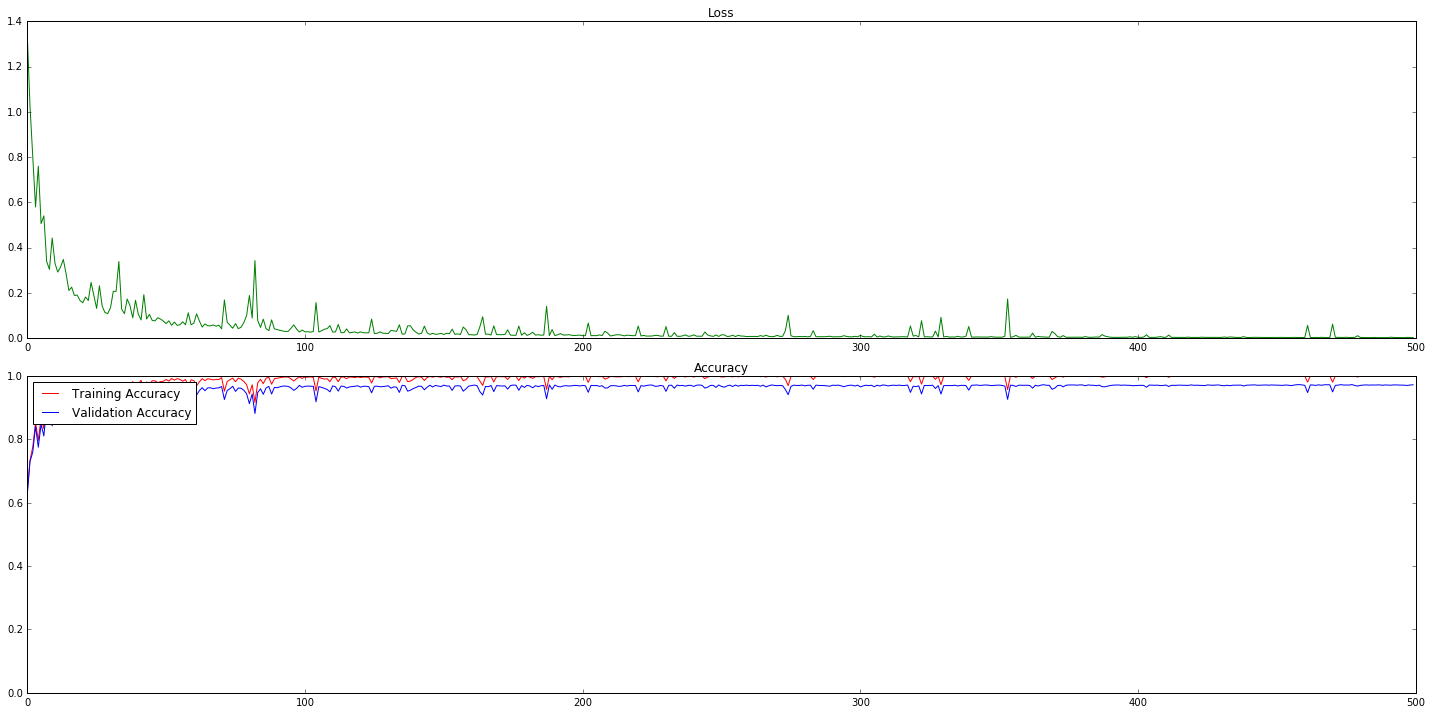

In [17]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(loss_batch, 'g')
#loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
#acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=2)
plt.tight_layout()
plt.show()

In [ ]:
session = tf.Session()
saver = tf.train.import_meta_graph(model_param_file+'.meta')
saver.restore(session, model_param_file)
all_vars = tf.trainable_variables()
for v in all_vars:
    print(v.name)
    
#    ckpt = tf.train.get_checkpoint_state(model_param_file)
#    if ckpt and ckpt.model_checkpoint_path:
#        print(ckpt.model_checkpoint_path)
#        saver.restore(session, ckpt.model_checkpoint_path)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.